## DATA 601 Project-1 (Spring 2022)
### Deadline: March 31, 11:59 pm
Please download these the csv files <br>
File-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

File-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

File-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

We will only use "Accident Year = 2020" data. So, please remove all the unncessary rows. Names these files as "crashes.csv", "persons.csv", and "vehicles.csv", respetively. I will test your notebook with the files I created, so if you have a different naming, your code won't work.

### Q1
From these three csv files, create a single dataframe which will include following columns only <br>
- from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),report no, county (county_desc), latittude, and longitude
- from the "persons.csv", gender, data of birth, and state code
- from the "vehicles.csv", vehicle year, vehicle make, speed limit
<br>

Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

# ****Please upload the .CSV files into google drive's Colab Notebooks folder**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#upload the downloaded CSV files into google drive then run the below code

from google.colab import drive

drive.mount('/content/drive')  
path1= "drive/MyDrive/Colab Notebooks/Maryland_Statewide_Vehicle_Crashes.csv"

crashes= pd.read_csv(path1)                            
crashes= crashes[crashes["YEAR"]==2020]                    #filtering 2020 crashes data
crashes.reset_index()
print(crashes.head())
crashes.to_csv("crashes.csv", index= False)


path2= "drive/MyDrive/Colab Notebooks/Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv"
persons= pd.read_csv(path2)
persons= persons[persons["YEAR"]==2020]                    #filtering 2020 persons data
persons.reset_index()
print(persons.head())
persons.to_csv("persons.csv", index= False)


path3= "drive/MyDrive/Colab Notebooks/Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv"
vehicles= pd.read_csv(path3)
vehicles= vehicles[vehicles["YEAR"]==2020]                 #filtering 2020 vehicles data
vehicles.reset_index()
print(vehicles.head())
vehicles.to_csv("vehicles.csv", index= False)             

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   YEAR QUARTER LIGHT_DESC  LIGHT_CODE     COUNTY_DESC  COUNTY_NO  MUNI_DESC  \
0  2020      Q2   Daylight        1.00       Baltimore        3.0        NaN   
1  2020      Q2        NaN        6.02  Baltimore City       24.0        NaN   
2  2020      Q2   Daylight        1.00      Montgomery       15.0        NaN   
4  2020      Q2   Daylight        1.00           Cecil        7.0        NaN   
5  2020      Q2   Daylight        1.00    Anne Arundel        2.0        NaN   

   MUNI_CODE     JUNCTION_DESC  JUNCTION_CODE  ... FEET_MILES_FLAG_DESC  \
0        NaN               NaN            NaN  ...                  NaN   
1        NaN  Non Intersection            1.0  ...                Miles   
2        NaN               NaN            NaN  ...                  NaN   
4        NaN               NaN            NaN  ...                  NaN   
5        NaN               NaN            NaN  ...                  NaN   

   FEET_MILES_FLAG DISTANCE_DIR_FLAG  REFERENCE_NO REFERENCE_TYPE_CO

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        SEX_DESC SEX_CODE     CONDITION_DESC  CONDITION_CODE  \
1292840   Female        F  Apparently Normal             1.0   
1292841      NaN      NaN            Unknown            99.0   
1292842     Male        M  Apparently Normal             1.0   
1292843     Male        M  Apparently Normal             1.0   
1292844   Female        F                NaN             NaN   

                         INJ_SEVER_DESC  INJ_SEVER_CODE     REPORT_NO  \
1292840  Possible Incapacitating Injury               3    DA32230016   
1292841                       No Injury               1    DA40360040   
1292842                       No Injury               1  MDTA1655001L   
1292843                       No Injury               1    CB60350070   
1292844                       No Injury               1   MSP71270044   

        OCC_SEAT_POS_DESC  OCC_SEAT_POS_CODE PED_VISIBLE_DESC  ...  \
1292840               NaN                NaN              NaN  ...   
1292841               NaN           

In [ ]:
# 1.merging the dataframes in to single dataframe

df= pd.merge(crashes, persons, on='REPORT_NO',how= 'inner')
md_crash_2020 = pd.merge(df,vehicles, on='REPORT_NO',how= 'inner')             #merging the dataframes
md_crash_2020 = md_crash_2020[['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC',
                               'LATITUDE','LONGITUDE','SEX_CODE','DATE_OF_BIRTH','LICENSE_STATE_CODE','VEH_YEAR',
                               'VEH_MAKE','SPEED_LIMIT']]                      #selecting specific columns which are required for this analysis.
print(md_crash_2020.head())

   ACC_DATE  ACC_TIME    WEATHER_DESC   REPORT_NO     COUNTY_DESC   LATITUDE  \
0  20200618  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
1  20200618  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
2  20200430  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
3  20200430  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
4  20200430  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   

   LONGITUDE SEX_CODE DATE_OF_BIRTH LICENSE_STATE_CODE  VEH_YEAR VEH_MAKE  \
0 -76.503693      NaN           NaN                NaN    2019.0      TOY   
1 -76.503693      NaN           NaN                NaN       NaN  UNKNOWN   
2 -76.616429        M    19750621.0                 MD    2005.0  HYUNDAI   
3 -76.616429        M    19750621.0                 MD    2014.0     SUBA   
4 -76.616429        M    19750621.0                 MD    2015.0     VOLK   

   SPEED_LIMIT  
0            5  
1            5  
2    

In [ ]:
print(md_crash_2020.shape)            #shape of the final dataframe.

print(md_crash_2020.info())           #checking the datatypes and null values in each columns of the dataframe.

(411734, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 411734 entries, 0 to 411733
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ACC_DATE            411734 non-null  int64  
 1   ACC_TIME            411734 non-null  object 
 2   WEATHER_DESC        99162 non-null   object 
 3   REPORT_NO           411734 non-null  object 
 4   COUNTY_DESC         411732 non-null  object 
 5   LATITUDE            411734 non-null  float64
 6   LONGITUDE           411734 non-null  float64
 7   SEX_CODE            375047 non-null  object 
 8   DATE_OF_BIRTH       374341 non-null  object 
 9   LICENSE_STATE_CODE  281728 non-null  object 
 10  VEH_YEAR            393084 non-null  float64
 11  VEH_MAKE            411712 non-null  object 
 12  SPEED_LIMIT         411734 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 44.0+ MB
None


### Q2
a. For each county, determine the average age of the drivers who were involved in these accidents  <br>
b. Then list the sorted averages (from youngest to oldest) <br>

In [ ]:
#2. converting acc_date & date_of_birth to datetime

from datetime import datetime, date
md_crash_2020[['ACC_DATE']] = md_crash_2020[['ACC_DATE']].astype(str)
md_crash_2020['ACC_DATE'] = pd.to_datetime(md_crash_2020['ACC_DATE'], errors='coerce')      #converting ACC_DATE to datetime

md_crash_2020[['DATE_OF_BIRTH']] = md_crash_2020[['DATE_OF_BIRTH']].astype(str).applymap(lambda s: s[:8])
md_crash_2020['DATE_OF_BIRTH'] = pd.to_datetime(md_crash_2020['DATE_OF_BIRTH'], errors='coerce')  #converting DATE_OF_BIRTH to datetime

print(md_crash_2020.head())
print(md_crash_2020.info())

md_crash_2020.to_csv("md_crash_2020.csv")

    ACC_DATE  ACC_TIME    WEATHER_DESC   REPORT_NO     COUNTY_DESC   LATITUDE  \
0 2020-06-18  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
1 2020-06-18  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
2 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
3 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
4 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   

   LONGITUDE SEX_CODE DATE_OF_BIRTH LICENSE_STATE_CODE  VEH_YEAR VEH_MAKE  \
0 -76.503693      NaN           NaT                NaN    2019.0      TOY   
1 -76.503693      NaN           NaT                NaN       NaN  UNKNOWN   
2 -76.616429        M    1975-06-21                 MD    2005.0  HYUNDAI   
3 -76.616429        M    1975-06-21                 MD    2014.0     SUBA   
4 -76.616429        M    1975-06-21                 MD    2015.0     VOLK   

   SPEED_LIMIT  
0            5  
1            5  

In [ ]:
# 2.a calculating age to find the avg age of drivers per county

md_crash_2020['AGE'] = (md_crash_2020['ACC_DATE']- md_crash_2020['DATE_OF_BIRTH']).astype('<m8[Y]')    #calculating age of a person at the time of accident.
print(md_crash_2020.groupby(["COUNTY_DESC"],as_index=False)["AGE"].mean())

# 2.b sorting averages from youngest to oldest

print("\n",md_crash_2020.groupby(["COUNTY_DESC"],as_index=False)["AGE"].mean().sort_values('AGE',ascending=True,ignore_index=True))


        COUNTY_DESC        AGE
0          Allegany  39.278689
1      Anne Arundel  37.481162
2         Baltimore  37.929904
3    Baltimore City  36.127458
4           Calvert  37.231669
5          Caroline  37.146429
6           Carroll  38.756482
7             Cecil  37.005231
8           Charles  36.150737
9        Dorchester  37.714850
10        Frederick  37.439508
11          Garrett  36.792841
12          Harford  38.075999
13           Howard  37.199817
14             Kent  38.870796
15       Montgomery  38.319774
16  Prince George's  36.443625
17     Queen Anne's  37.916318
18         Somerset  37.440567
19       St. Mary's  36.376847
20           Talbot  38.808812
21       Washington  37.359000
22         Wicomico  36.430564
23        Worcester  34.228873

         COUNTY_DESC        AGE
0         Worcester  34.228873
1    Baltimore City  36.127458
2           Charles  36.150737
3        St. Mary's  36.376847
4          Wicomico  36.430564
5   Prince George's  36.443625
6     

### Q3
a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)<br>
b. Determine average age of the car involved in these accidents for each "vehicle make".  <br>

In [ ]:
# 3.a tot number of crashes per vehicle make

print(md_crash_2020["VEH_MAKE"].value_counts())              #number of crashes per vehicle

# 3.b Avg age of car involved in these accidents
crash_copy= md_crash_2020.copy()                                       #creating a copy of md_crash_2020 dataframe
crash_copy= crash_copy.dropna(subset=['VEH_YEAR'],how='all')           #dropping the Nan's in VEH_YEAR column
crash_copy= crash_copy[(crash_copy.VEH_YEAR > 1000) & (crash_copy.VEH_YEAR <= 2020)]    #dropping the outlier's from VEH_YEAR column since that will effect the car age calculation
print(crash_copy.info())   
        
crash_copy['ACC_YEAR']= crash_copy['ACC_DATE'].dt.year                      #extracting the year from Accident date.
crash_copy['CAR_AGE'] = (crash_copy['ACC_YEAR']- crash_copy['VEH_YEAR'])    #calculating the car age from accident year & vehicle year.
print(crash_copy.groupby(['VEH_MAKE'],as_index=False)['CAR_AGE'].mean())

FORD             48525
HONDA            41282
TOYOTA           39668
NISSAN           28016
UNKNOWN          18929
                 ...  
B,W                  1
TRLR                 1
HONFA                1
MERCRDEZ BENZ        1
AUDLI                1
Name: VEH_MAKE, Length: 2433, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390730 entries, 0 to 411731
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ACC_DATE            390730 non-null  datetime64[ns]
 1   ACC_TIME            390730 non-null  object        
 2   WEATHER_DESC        93271 non-null   object        
 3   REPORT_NO           390730 non-null  object        
 4   COUNTY_DESC         390729 non-null  object        
 5   LATITUDE            390730 non-null  float64       
 6   LONGITUDE           390730 non-null  float64       
 7   SEX_CODE            364396 non-null  object        
 8   DATE_OF_BIRTH     

### Q4
a. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,  <br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found at https://github.com/simsekergun/DATA601/tree/main/Project1

In [ ]:
# 4. calculating the distance from the circle centre to each lat & lon 
from math import radians, sin, cos, acos

lat1 = 39.016149                 #circle centered at (39.016149, -77.117942)
lon1 = -77.117942
dist_list = []
for lat2, lon2 in zip(md_crash_2020.LATITUDE, md_crash_2020.LONGITUDE):
  r = 6371
  phi1 = np.radians(lat1)
  phi2 = np.radians(lat2)
  delta_phi = np.radians(lat2-lat1)
  delta_lambda = np.radians(lon2-lon1)
  a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
  dist = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))     #distance from circle centre to a each (latitude, longitude)
  dist_list.append(np.round(dist, 2))                       #rounding the calulated distance to 2 decimal point & appending to the list


md_crash_2020.insert(14, "DISTANCE", dist_list)             #adding the dist_list as a "DISTANCE" column to the "md_crash_2020" dataframe
print(md_crash_2020.head())

    ACC_DATE  ACC_TIME    WEATHER_DESC   REPORT_NO     COUNTY_DESC   LATITUDE  \
0 2020-06-18  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
1 2020-06-18  15:15:00  Not Applicable  AE58770052       Baltimore  39.277263   
2 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
3 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   
4 2020-04-30  06:39:00             NaN  ADJ984001J  Baltimore City  39.311025   

   LONGITUDE SEX_CODE DATE_OF_BIRTH LICENSE_STATE_CODE  VEH_YEAR VEH_MAKE  \
0 -76.503693      NaN           NaT                NaN    2019.0      TOY   
1 -76.503693      NaN           NaT                NaN       NaN  UNKNOWN   
2 -76.616429        M    1975-06-21                 MD    2005.0  HYUNDAI   
3 -76.616429        M    1975-06-21                 MD    2014.0     SUBA   
4 -76.616429        M    1975-06-21                 MD    2015.0     VOLK   

   SPEED_LIMIT   AGE  DISTANCE  
0            5   

In [ ]:
# 4.a  all the accidents that happened in the circle centered at (39.016149, -77.117942) with a radius of 5 km

ACC_5KM = md_crash_2020[md_crash_2020["DISTANCE"] <= 5]

print("all the accidents that happened in the circle with a radius of 5KM are:","\n","\n", ACC_5KM)

#4.b number of accidents where the speed limit was above 51 miles per hour. 

ACC_SPEED_above51miles = md_crash_2020[(md_crash_2020["DISTANCE"] <= 5)& (md_crash_2020["SPEED_LIMIT"] > 51)]

print("number of accidents where the speed limit was above 51 miles per hour are:", len(ACC_SPEED_above51miles))

#4.c the number of accidents where the speed limit was below 41 miles per hour.

ACC_SPEED_below41miles = md_crash_2020[(md_crash_2020["DISTANCE"] <= 5)& (md_crash_2020["SPEED_LIMIT"] < 41)]

print("number of accidents where the speed limit was below 41 miles per hour are:", len(ACC_SPEED_below41miles))


all the accidents that happened in the circle with a radius of 5KM are: 
 
          ACC_DATE  ACC_TIME WEATHER_DESC    REPORT_NO COUNTY_DESC   LATITUDE  \
36     2020-06-30  11:05:00          NaN  MCP23720030  Montgomery  39.051871   
37     2020-06-30  11:05:00          NaN  MCP23720030  Montgomery  39.051871   
384    2020-05-19  16:57:00          NaN  MCP3085002C  Montgomery  39.026033   
385    2020-05-19  16:57:00          NaN  MCP3085002C  Montgomery  39.026033   
434    2020-08-12  09:59:00          NaN  MCP2411005P  Montgomery  39.053667   
...           ...       ...          ...          ...         ...        ...   
411120 2020-10-25  14:00:00      Raining  MCP31110031  Montgomery  39.051407   
411121 2020-10-25  14:00:00      Raining  MCP31110031  Montgomery  39.051407   
411122 2020-10-25  14:00:00      Raining  MCP31110031  Montgomery  39.051407   
411123 2020-10-25  14:00:00      Raining  MCP31110031  Montgomery  39.051407   
411124 2020-10-25  14:00:00      Raining  MC

### Q5
Download "Licensed Drivers By Sex" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

a. Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them <br>
`St Male Female` <br>
`NY 1510  622` <br>
`PA 1251 1312` <br>
... <br>
Note: DMV states: DC, MD, and VA  <br>
 <br>
b. Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be <br>
<br>
`St    Male_Norm  Female_Norm` <br>
`NY    1.510e-3  0.311e-3` <br>



In [ ]:
# 5.loading the Licensed Drivers By Sex data into a dataframe.

path4= "drive/MyDrive/Colab Notebooks/states_drivers.csv"
drivers_sex= pd.read_csv(path4)
print(drivers_sex.head(),"\n")
print(drivers_sex.info())
print("\n",drivers_sex.shape)


        STATE        MALE      FEMALE
0    Alabama   1,896,942   2,010,096 
1      Alaska     251,993     281,234
2    Arizona    2,502,985   2,475,777
3  Arkansas     1,041,548   1,078,030
4  California  12,968,614  12,564,306 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   51 non-null     object
 1   MALE    51 non-null     object
 2   FEMALE  51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
None

 (51, 3)


In [ ]:
# creating a dictionary to convert state to state-code

us_state_to_abbrev = {
   'Alabama ':'AL',
'Alaska':'AK',
'Arizona ':'AZ',
'Arkansas  ':'AR',
'California':'CA',
'Colorado':'CO',
'Connecticut':'CT',
'Delaware':'DE',
'Dist. of Col. ':'DC',
'Florida ':'FL',
'Georgia ':'GA',
'Hawaii':'HI',
'Idaho':'ID',
'Illinois':'IL',
'Indiana ':'IN',
'Iowa ':'IA',
'Kansas':'KS',
'Kentucky ':'KY',
'Louisiana ':'LA',
'Maine ':'ME',
'Maryland ':'MD',
'Massachusetts ':'MA',
'Michigan ':'MI',
'Minnesota ':'MN',
'Mississippi ':'MS',
'Missouri ':'MO',
'Montana  ':'MT',
'Nebraska ':'NE',
'Nevada ':'NV',
'New Hampshire ':'NH',
'New Jersey  ':'NJ',
'New Mexico  ':'NM',
'New York ':'NY',
'North Carolina':'NC',
'North Dakota ':'ND',
'Ohio ':'OH',
'Oklahoma':'OK',
'Oregon ':'OR',
'Pennsylvania':'PA',
'Rhode Island ':'RI',
'South Carolina ':'SC',
'South Dakota':'SD',
'Tennessee ':'TN',
'Texas':'TX',
'Utah ':'UT',
'Vermont ':'VT',
'Virginia ':'VA',
'Washington ':'WA',
'West Virginia ':'WV',
'Wisconsin  ':'WI',
'Wyoming  ':'WY'
}


In [ ]:
# 5.a num of drivers in a car crash with respect to gender and state

drivers_sex["STATE_CODE"]= drivers_sex['STATE'].map(us_state_to_abbrev)                    #mapping State code to state in drivers data.

crash_sex = md_crash_2020[["ACC_DATE", "SEX_CODE", "LICENSE_STATE_CODE"]]                  #selecting specific columns.
crash_sex['LICENSE_STATE_CODE'] = crash_sex['LICENSE_STATE_CODE'].replace(['NB'],'NE')     #replacing NB to NE as Nebraska has changed to NE since 1969.

crash_driver = pd.merge(crash_sex, drivers_sex, left_on= 'LICENSE_STATE_CODE', right_on= 'STATE_CODE' , how= 'inner')    # using inner join as states other than in drivers_sex dataframe will be noised data as US has only 50 states.
crash_driver = crash_driver[(crash_driver.LICENSE_STATE_CODE != "DC")  & (crash_driver.LICENSE_STATE_CODE != "MD") & (crash_driver.LICENSE_STATE_CODE != "VA") & (crash_driver.SEX_CODE != 'U')]

grouped_data= crash_driver.groupby(["LICENSE_STATE_CODE"])["SEX_CODE"].value_counts().unstack(level= 'SEX_CODE')

print("num of drivers in a car crash:","\n", grouped_data)

grouped_data.to_csv("grouped.csv")                     #pushing the groupby output to.csv

num of drivers in a car crash: 
 SEX_CODE               F     M
LICENSE_STATE_CODE            
AK                    19    29
AL                    41    67
AR                    23    37
AZ                    66   124
CA                   189   325
CO                    42   106
CT                    93   150
DE                  1064  1783
FL                   555  1145
GA                   245   466
HI                     6    15
IA                     6    21
ID                     7    19
IL                    42   113
IN                    46    52
KS                     5    45
KY                    30    90
LA                    46    61
MA                   231   342
ME                    75   132
MI                    56   175
MN                    16    64
MO                    35    57
MS                    33    63
MT                     6    10
NC                   436   768
ND                    10    49
NE                     7    20
NH                    18    46
NJ    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#5.b Normalize the previous list with number of male drivers and female drivers for each state.

drivers_sex= drivers_sex[(drivers_sex['STATE_CODE'] != 'MD') & (drivers_sex['STATE_CODE'] != 'DC') & (drivers_sex['STATE_CODE'] != 'VA')]
grouped_df= pd.read_csv("grouped.csv")
df_normalize = pd.merge(grouped_df, drivers_sex, left_on= 'LICENSE_STATE_CODE', right_on= 'STATE_CODE', how='inner')   #merging the grouped.csv with licensed drivers by sex data

df_normalize['MALE']= df_normalize['MALE'].str.replace(',', '').astype(int)
df_normalize['FEMALE']= df_normalize['FEMALE'].str.replace(',', '').astype(int)

df_normalize['Female_Norm']= df_normalize['F']/ df_normalize['FEMALE']         #normalizing the female count using the total number of females in each state.
df_normalize['Male_Norm']= df_normalize['M']/ df_normalize['MALE']           #normalizing the male count using the total number of males in each state.

df_normalize['Female_Norm']= df_normalize['Female_Norm'].apply(lambda x: "{:.2e}".format(x))  #formating the normalized column to scientific notation.
df_normalize['Male_Norm']= df_normalize['Male_Norm'].apply(lambda x: "{:.2e}".format(x))  #formating the normalized column to scientific notation.

print("normalized number of male & female drivers:", "\n",df_normalize[["LICENSE_STATE_CODE","Female_Norm","Male_Norm"]] )

normalized number of male & female drivers: 
    LICENSE_STATE_CODE Female_Norm Male_Norm
0                  AK    6.76e-05  1.15e-04
1                  AL    2.04e-05  3.53e-05
2                  AR    2.13e-05  3.55e-05
3                  AZ    2.67e-05  4.95e-05
4                  CA    1.50e-05  2.51e-05
5                  CO    2.17e-05  5.20e-05
6                  CT    7.16e-05  1.18e-04
7                  DE    2.79e-03  4.94e-03
8                  FL    7.63e-05  1.64e-04
9                  GA    6.78e-05  1.42e-04
10                 HI    1.37e-05  3.19e-05
11                 IA    5.34e-06  1.91e-05
12                 ID    1.24e-05  3.33e-05
13                 IL    9.79e-06  2.71e-05
14                 IN    2.02e-05  2.37e-05
15                 KS    4.88e-06  4.48e-05
16                 KY    1.96e-05  6.04e-05
17                 LA    2.64e-05  3.77e-05
18                 MA    9.00e-05  1.38e-04
19                 ME    1.45e-04  2.62e-04
20                 MI    1.54e

### Q6
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?  <br>

In [ ]:
# 6.a  which day of the week has most crashes

md_crash_2020["DAY"] = md_crash_2020["ACC_DATE"].dt.day_name()
print(md_crash_2020.groupby(["DAY"])["DAY"].count())
print("\n","On",md_crash_2020["DAY"].value_counts().idxmax(),"the most of the crashes had happen","\n")

# 6.b which hour of the day
md_crash_2020['ACC_TIME'] = pd.to_datetime(md_crash_2020['ACC_TIME'])
md_crash_2020["HOUR"] = md_crash_2020['ACC_TIME'].apply(lambda x: x.hour)
print(md_crash_2020.groupby(["HOUR"])['HOUR'].count())
print("\n","At",md_crash_2020["HOUR"].value_counts().idxmax(),"hour, the most of the crashes had happen")

DAY
Friday       69915
Monday       56742
Saturday     60173
Sunday       49434
Thursday     59762
Tuesday      55824
Wednesday    59884
Name: DAY, dtype: int64

 On Friday the most of the crashes had happen 

HOUR
0      8069
1      6446
2      5048
3      3634
4      3092
5      5153
6      9180
7     13697
8     15077
9     15427
10    16663
11    20336
12    25293
13    24760
14    28656
15    33578
16    33769
17    34859
18    29192
19    22161
20    18439
21    15831
22    12573
23    10801
Name: HOUR, dtype: int64

 At 17 hour, the most of the crashes had happen


### Q7
Download "Maryland Average Precipitation and Snow 2020" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day. <br>
a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days? <br>
b. What does this ratio tell us?

In [ ]:
# 7. uploading MD2020_Rain_Snow data

path5= "drive/MyDrive/Colab Notebooks/MD2020_Rain_Snow.csv"
MD2020_Rain_Snow= pd.read_csv(path5)
print(MD2020_Rain_Snow.head(),"\n")
print(MD2020_Rain_Snow.info())
print("\n",MD2020_Rain_Snow.shape)

MD2020_Rain_Snow['DAY_TYPE'] = np.where((MD2020_Rain_Snow['Precip in.'] > 0.05) | (MD2020_Rain_Snow['Snow in.'] > 1), 'rainy/snowy day', 'non-rainy/snowy day')


MD2020_Rain_Snow['Date'] = pd.to_datetime(MD2020_Rain_Snow['Date'])              #converting "Date" to datetime datatype
print("\n",MD2020_Rain_Snow.head(20))

crashes_rain_snow= pd.merge(md_crash_2020, MD2020_Rain_Snow, left_on='ACC_DATE', right_on= 'Date',how= 'inner') #merging md_crash_2020 with Rain_snow data
print("\n",crashes_rain_snow.head())
print("\n",crashes_rain_snow.shape)


# a. ratio of accidents on rainy/snowy day to non-rainy/snowy day

#crashes_rain_snow.groupby(['DAY_TYPE'])['DAY_TYPE'].count()
temp= crashes_rain_snow['DAY_TYPE'].value_counts()
print("\n",temp)

ratio= temp['rainy/snowy day']/temp['non-rainy/snowy day']
print("\n","ratio of accidents on rainy/snowy day to non-rainy/snowy day :", ratio)


# b. total number of accidents on the rainy/snowy day is 59.6% (i.e, ~60%) of the total number of accidents on the non-rainy/snowy day.
#     Also it is very evident that the number of accidents are more on the non-rainy/snowy days.



        Date  Precip in.  Snow in.
0  1/1/2020         0.00         0
1  1/2/2020         0.00         0
2  1/3/2020         0.19         0
3  1/4/2020         0.21         0
4  1/5/2020         0.15         0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        366 non-null    object 
 1   Precip in.  366 non-null    float64
 2   Snow in.    366 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None

 (366, 3)

          Date  Precip in.  Snow in.             DAY_TYPE
0  2020-01-01        0.00         0  non-rainy/snowy day
1  2020-01-02        0.00         0  non-rainy/snowy day
2  2020-01-03        0.19         0      rainy/snowy day
3  2020-01-04        0.21         0      rainy/snowy day
4  2020-01-05        0.15         0      rainy/snowy day
5  2020-01-06        0.00         0  non-rainy/snowy day


#Q8
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


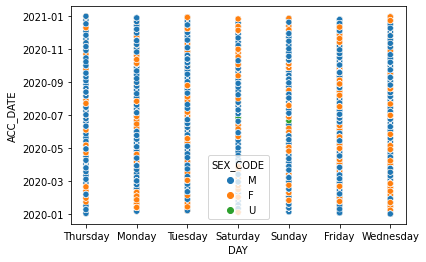

In [ ]:
# 8. DATA VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='DAY', y='ACC_DATE', data=md_crash_2020,
               hue='SEX_CODE')                                #shows vizualization of Day with Accident date along with each sex.
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


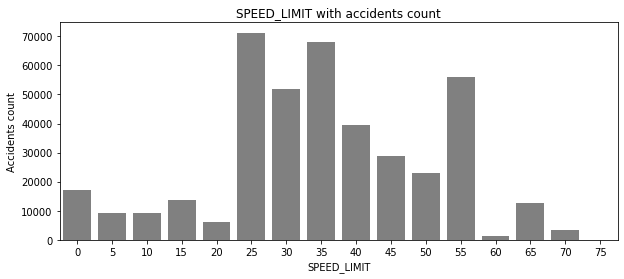

In [ ]:
#shows vizualization of number of Accidents with different speed limits

plt.figure(figsize=(10,4))
sns.countplot(md_crash_2020['SPEED_LIMIT'], color='gray')
plt.xlabel('SPEED_LIMIT')
plt.ylabel('Accidents count')
plt.title('SPEED_LIMIT with accidents count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


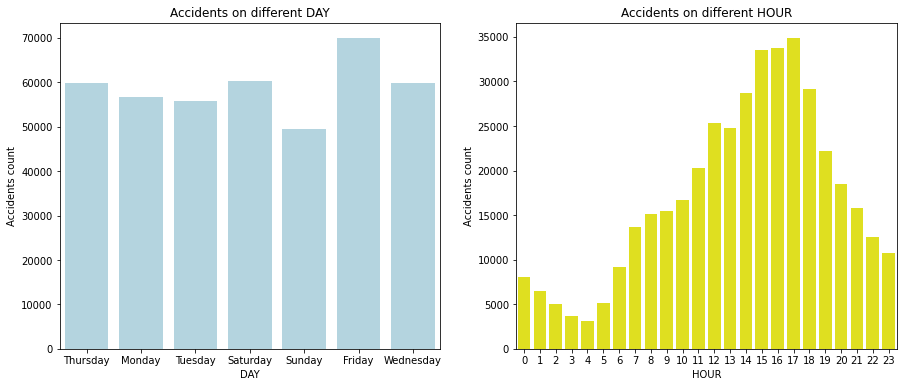

In [ ]:
#shows vizualization of number of Accidents with respect to DAY & HOUR

viz_cols= ['DAY','HOUR']
fig, axes = plt.subplots(1,2, figsize=(15,6))
color= ['lightblue','yellow']

for i,j in enumerate(viz_cols):
  sns.countplot(md_crash_2020[j], color=color[i],ax= axes[i])
  axes[i].set_xlabel(j)
  axes[i].set_ylabel('Accidents count')
  axes[i].set_title('Accidents on different {0}'.format(j))

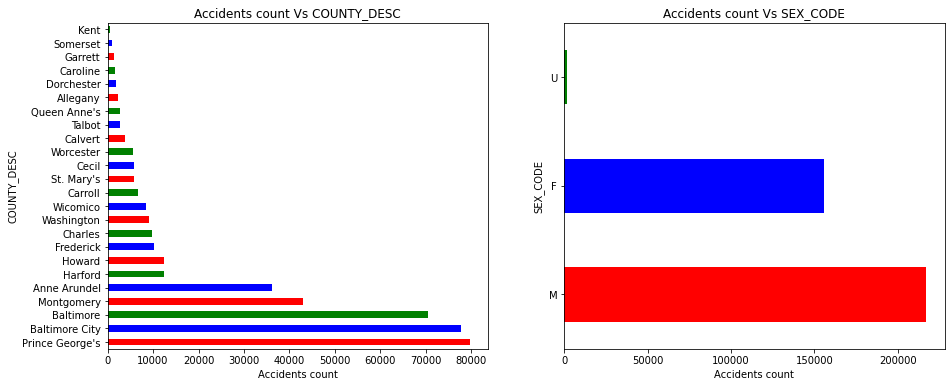

In [ ]:
#shows vizualization of number of Accidents at each COUNTY & SEX_CODE

list_col= ["COUNTY_DESC", "SEX_CODE"]
fig, axes = plt.subplots(1,2, figsize=(15,6))

for i,j in enumerate(list_col):
  md_crash_2020[j].value_counts().plot(kind='barh',color=['red','blue','green'],ax= axes[i])
  axes[i].set_xlabel('Accidents count')
  axes[i].set_ylabel(j)
  axes[i].set_title('Accidents count Vs {0}'.format(j))

In [ ]:
# US MAP data vizualization to show 

from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

df_normalize['TOTAL']= df_normalize['F']+ df_normalize['M']

list_loc=[]

for i in df_normalize['STATE']:
  location = geolocator.geocode(i)
  list_loc.append(location)


#adding latitude & longitude of each State to dataframe

list_lat=[]
list_lon=[]
for i in range(len(list_loc)):
  list_lat.append(list_loc[i].latitude)
  list_lon.append(list_loc[i].longitude)

df_normalize.insert(7, "ST_LAT", list_lat)
df_normalize.insert(8, "ST_LON", list_lon)

#df_normalize.head()


world_map= folium.Map(tiles="cartodbpositron",zoom_start=2)             #creating an empty map
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(df_normalize)):
        lat = df_normalize.iloc[i]['ST_LAT']
        long = df_normalize.iloc[i]['ST_LON']
        popup_text = """State : {}<br>
                    Total num of Accidents : {}<br>"""
        popup_text = popup_text.format(df_normalize.iloc[i]['STATE'],       #for each coordinate,create marker of num of accidents in that state.
                                   df_normalize.iloc[i]['TOTAL']
                                   )
        folium.Marker(location = [lat, long], popup= popup_text).add_to(marker_cluster)    
#show the map
world_map

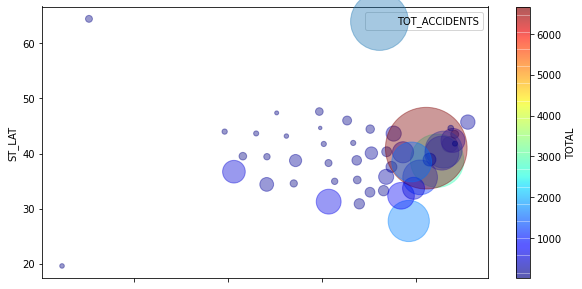

In [ ]:
# shows total size of accidents at each latitude & longitude pair.

df_normalize.plot(kind="scatter", x="ST_LON", y="ST_LAT",
    s='TOTAL', label="TOT_ACCIDENTS",
    c= 'TOTAL', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,5))
plt.legend()
plt.show()